<div style="text-align:center;color:#FFF;background-color:#FC3;height:100px"> <h1>Importing libraries</h1></div>

In [111]:
import pandas as pd
import re
import pycountry

<div style="text-align:center;color:#FFF;background-color:#FC3;height:100px"> <h1>Data exploration</h1></div>

<div style="text-align: center"> <h2>Overview</h2></div>

In [126]:
df=pd.read_csv('dataset/df_job.csv', encoding = 'ISO-8859-1')
df.groupby('Job Type')['Job Type'].count()

Job Type
Full Time     3116
Internship      75
Part Time        6
Name: Job Type, dtype: int64

In [105]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 3198
Columns: 8


In [106]:
df.dtypes

Company                       object
Job Title                     object
Location                      object
Job Type                      object
Experience level              object
Salary                        object
Requirment of the company     object
Facilities                    object
dtype: object

<div style="background-color:#432D;">
<h4>Data field Job Salaries Dataset has <mark>8 columns</mark>, each are:</h4><ul>
<li><b> <mark>1. Company</mark></b>: The name of company.</li>
<li><b> <mark>2. Job Title</mark></b>: The role work.</li>
<li><b> <mark>3. Location</mark></b>: Employee's primary country of residence with option remote.</li>
<li><b> <mark>4. Job Type</mark></b>: The type of employment for the role</li>
<li><b> <mark>5. Experience level</mark></b>: The experience level in the job</li>
<li><b> <mark>6. Salary</mark></b>: offerd salary for this work role</li>
<li><b> <mark>7. Requirment of the company</mark></b>: The skills that company want.</li>
<li><b> <mark>8. Facilities</mark></b>: The flexibility of job.</li>
</ul>
</div>

In [107]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirment of the company       0
Facilities                      0
dtype: int64

In [108]:
df.nunique()

Company                       1106
Job Title                     2138
Location                      1117
Job Type                         3
Experience level                 4
Salary                         218
Requirment of the company     2600
Facilities                     777
dtype: int64

In [109]:
df.duplicated().sum()

202

In [110]:
df.head().style.set_properties(**{'background-color': '#00b4','color': 'white','border-color': '#8b8c8c'}).highlight_null(color="red")

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathematics,SAS,Statistics",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,nan,90K+ *,"Agile,Architecture,AWS,Computer Science,Computer Vision,Deep Learning","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow,Data pipelines","Flex hours,Flex vacation,Parental leave,Unlimited paid time off,"


In [7]:
df.tail().style.set_properties(**{'background-color': '#00b9','color': 'white','border-color': '#8b8c8c'},highlight_null="red").highlight_null(color="red")

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
3193,Western Digital,Data Scientist - New College Graduate,"Biñan, Philippines",Full Time,Entry-level,39K+ *,"APIs,Clustering,Computer Science,Data visualization,Deep Learning,Docker","Career development,,,,"
3194,Experian,Cloud Data Analyst,"Heredia, Costa Rica",Full Time,Senior-level,92K+ *,"AWS,Big Data,Computer Science,GCP,Snowflake,SQL","Equity,Medical leave,Salary bonus,,"
3195,Locus Robotics,"Robotics Engineer, Sensors","Wilmington, MA, United States",Full Time,Senior-level,62K+ *,"E-commerce,Engineering,Linux,Python,Robotics,Statistics",",,,,"
3196,ATB Financial,Data Scientist,"Edmonton, Alberta, Canada",Full Time,Entry-level,39K+ *,"Computer Science,Data Analytics,Data Mining,Economics,Engineering,GCP","Career development,Startup environment,,,"
3197,Shippeo,Senior Data Engineer,"Paris, France",Full Time,Senior-level,115K+ *,"Airflow,Architecture,BigQuery,CI/CD,Computer Science,Data pipelines",",,,,"


<div style="text-align:center;color:#FFF;background-color:#FC3;height:100px"> <h1>Data cleaning</h1></div>

In [112]:
df.loc[df['Job Type'] == 'Internship', 'Salary'] = 0


# Covert salary Dataype to int
def salary_corr(txt):
    if str(txt).find('K')!=-1:
        return int(re.findall(r'\d+', txt)[0])*1000
    else:
        return txt
        

df['Salary']=df['Salary'].apply(salary_corr)

In [113]:
# Find the country name from location
def detect_country_name(location_name):
    if isinstance(location_name,float):
        return location_name
    elif 'REMOTE' in location_name:
        return 'REMOTE' 
    else:
        country=location_name.split(',')[-1]
        try:
            country=pycountry.countries.search_fuzzy(country)[0].name
        except:
            pass
        return country.upper()

df['Location']=df['Location'].apply(detect_country_name)

In [114]:
# Fix the 'Requirment of the company ' column
def remove_trailing_commas(input_string):
    if isinstance(input_string,str):
        while input_string.endswith(","):
            input_string = input_string[:-1]
    return input_string


df['Requirment of the company ']=df['Requirment of the company '].apply(remove_trailing_commas)

In [115]:
# Replace the null value in the Experience by 'All-Level' because the company accepet all levels
df['Experience level'].fillna('All-Level',inplace=True)

In [116]:
# Drop the 'Facilities' columns
df.drop(columns=['Facilities'],inplace=True)
# Drop the lines thath containt null values because it's come probably from entries errors
df.dropna(inplace=True)

In [118]:
df.to_csv('cleaned.csv')

In [130]:
#make category by the job title corllation


C:\Users\Youcode\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


80

<div style="text-align:center;color:#FFF;background-color:#FC3;height:100px"> <h1>Visualization</h1></div>

<Axes: xlabel='Job Type'>

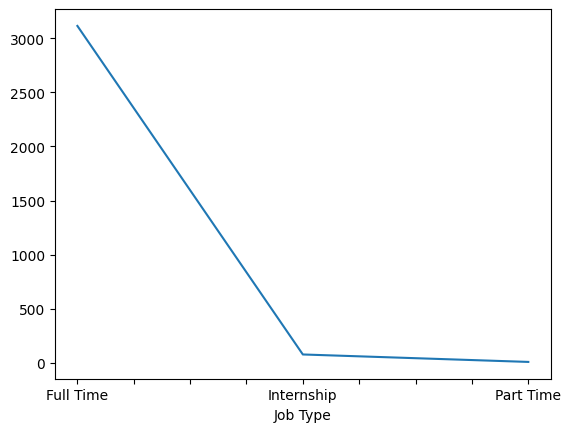

In [129]:
df.groupby('Job Type')['Job Type'].count().plot()